In [20]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [21]:
base_path = r"C:\Users\Priya\OneDrive\Desktop\house price prediction\dataset3\train"

categories = ['cat', 'dog']
data = []
labels = []




In [30]:
for category in categories:
    folder = os.path.join(base_path, category)
    label = categories.index(category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            data.append(img.flatten())
            labels.append(label)
        except Exception as e:
            print("Error reading:", img_path, "|", e)

data = np.array(data)
labels = np.array(labels)
print("✅ Images loaded:", len(data))
print("📏 Data shape:", data.shape)




✅ Images loaded: 4
📏 Data shape: (4, 12288)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5, random_state=42)

In [33]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy * 100:.2f}%")



🎯 Accuracy: 50.00%


In [38]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠ Image not found at: {img_path}")
        return
    img_resized = cv2.resize(img, (64, 64))
    img_flat = img_resized.flatten().reshape(1, -1)
    pred = svm_model.predict(img_flat)[0]
    label = "🐶 Dog" if pred == 1 else "🐱 Cat"
    
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


In [48]:
# Example dog image
predict_image= (r"C:\Users\Priya\OneDrive\Desktop\house price prediction\dataset3\train\dog\dog (2).jpg")



C:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


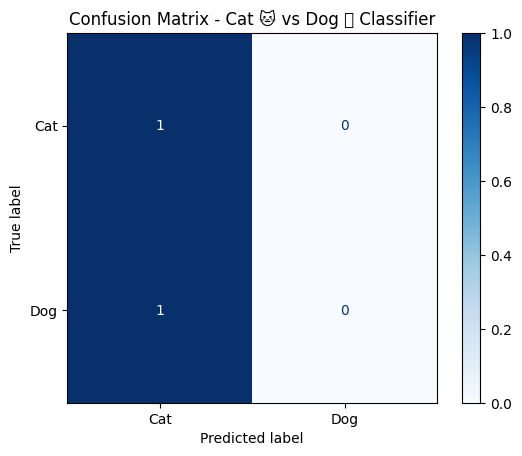

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Display it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix - Cat 🐱 vs Dog 🐶 Classifier")
plt.show()